<a href="https://colab.research.google.com/github/SaurabhSRP/NewsApp_Flask/blob/main/News_App_Bert_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bert-extractive-summarizer
!pip install newspaper3k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 93.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.wh

#**Import all libraries**

In [ ]:
from summarizer import Summarizer
from PIL import Image
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
from newspaper import Article
import nltk
nltk.download('punkt')
import io

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#**Data Extraction using Google API and Newspaper3k**

In [ ]:
site = 'https://news.google.com/rss/search?q=politics'
op = urlopen(site)  # Open that site
rd = op.read()  # read data from site
op.close()  # close the object
sp_page = soup(rd, 'xml')  # scrapping data from site
news_list = sp_page.find_all('item')  # finding news



data=[]
link=[]
title=[]
image_link=[]
c=0
try:
  for news in news_list:
    c+=1
    if c <=5:
      print('Title: ',news.title.text)
      title.append(' '.join(news.title.text))
      print('News Link ',news.link.text)
      link.append(' '.join(news.link.text))
      news_data = Article(news.link.text)
      news_data.download()
      news_data.parse()
      data.append(''.join(news_data.text))
      print("News Poster Link: ",news_data.top_image)
      image_link.append(news_data.top_image)

except:
  pass

Title:  Federal Reserve increases interest rates by a quarter point to 16-year high – as it happened - The Guardian US
News Link  https://news.google.com/rss/articles/CBMibGh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS91cy1uZXdzL2xpdmUvMjAyMy9tYXkvMDMvZGVidC1jZWlsaW5nLWludGVyZXN0LXJhdGVzLWJpZGVuLXBvbGl0aWNzLWxpdmUtdXBkYXRlc9IBbGh0dHBzOi8vYW1wLnRoZWd1YXJkaWFuLmNvbS91cy1uZXdzL2xpdmUvMjAyMy9tYXkvMDMvZGVidC1jZWlsaW5nLWludGVyZXN0LXJhdGVzLWJpZGVuLXBvbGl0aWNzLWxpdmUtdXBkYXRlcw?oc=5
News Poster Link:  https://i.guim.co.uk/img/media/df636f2bc566588604fad8cc20ca99b3ae5f2751/0_188_5640_3384/master/5640.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctbGl2ZS5wbmc&enable=upscale&s=88317a804a3493edadf750913621da53
Title:  Rep. Colin Allred launches Senate campaign against Ted Cruz - CNN
News Link  https://news.google.com/rss/articles/CBMiT2h0dHBzOi8vd3d3LmNubi5jb20vMjAyMy8wNS8wMy9wb2xpdGljcy9jb2xpbi1hbGxyZW

#**Bert Implementation**

In [ ]:
data = [i.replace('\n','') for i in data]

In [ ]:
bert_model = Summarizer()
summary=[]
for i in range(0,3):
  best_summary=''.join(bert_model(data[i],min_length=30))
  summary.append(best_summary)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
summary

['From 21h ago 11.49 EDT Fed poised to raise interest rates again The Federal Reserve is set to raise interest rates this afternoon, with an announcement coming at 2pm ET from the central bank after its most recent board meeting. This would be the central bank’s 10th interest rate increase since March 2022, when rates were at zero. Analysts and economists will be closely watching Powell’s press conference at 2.30pm, where he will discuss the direction Fed staff see the economy going, giving hints as to whether even more interest rate hikes are to come or whether the Fed will end its rate-hike campaign. We’ll be closing this blog for today. Thoughts and prayers are not enough.” Georgia Sen Raphael Warnock shares that his two young kids were on lockdown today in Atlanta after the shooting. I think it’s enabled us to see more data and it will continue to do so. Of course, Powell noted earlier in the press conference that the full impacts of the interest rate increases have yet to be seen,

Title:  Federal Reserve increases interest rates by a quarter point to 16-year high – as it happened - The Guardian US
News Link  https://news.google.com/rss/articles/CBMibGh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS91cy1uZXdzL2xpdmUvMjAyMy9tYXkvMDMvZGVidC1jZWlsaW5nLWludGVyZXN0LXJhdGVzLWJpZGVuLXBvbGl0aWNzLWxpdmUtdXBkYXRlc9IBbGh0dHBzOi8vYW1wLnRoZWd1YXJkaWFuLmNvbS91cy1uZXdzL2xpdmUvMjAyMy9tYXkvMDMvZGVidC1jZWlsaW5nLWludGVyZXN0LXJhdGVzLWJpZGVuLXBvbGl0aWNzLWxpdmUtdXBkYXRlcw?oc=5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


From 21h ago 11.49 EDT Fed poised to raise interest rates again The Federal Reserve is set to raise interest rates this afternoon, with an announcement coming at 2pm ET from the central bank after its most recent board meeting. We’ll be closing this blog for today. Georgia Sen Raphael Warnock shares that his two young kids were on lockdown today in Atlanta after the shooting. Hoping and praying they're safe," he says from the Senate floor. — Police said they are still searching for a suspect. Updated at 16.00 EDT

17h ago 15.42 EDT The Washington Post just published a cheery report that the White House and lawmakers on Capitol Hill technically have just six working days together before the US government potentially defaults on its debt on 1 June. I think it’s enabled us to see more data and it will continue to do so. We thought that this rate hike, along with the meaningful change in our policy statement, was the right way to balance that. It’s possible that we can continue to have a c

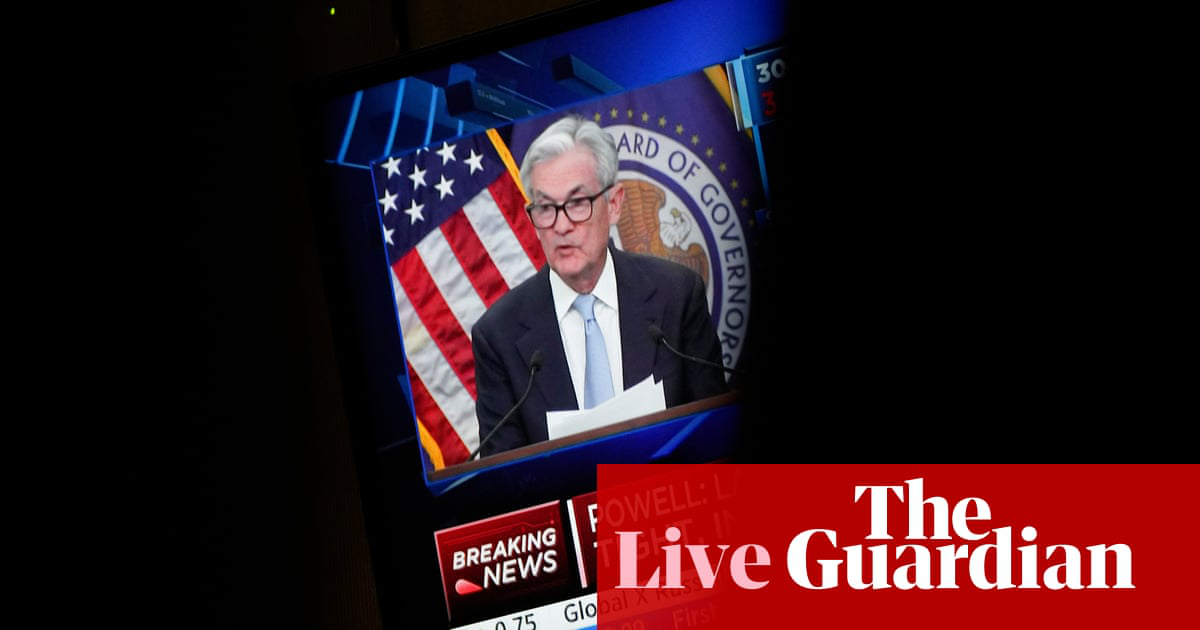

News Poster Link:  https://i.guim.co.uk/img/media/df636f2bc566588604fad8cc20ca99b3ae5f2751/0_188_5640_3384/master/5640.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctbGl2ZS5wbmc&enable=upscale&s=88317a804a3493edadf750913621da53
Title:  Rep. Colin Allred launches Senate campaign against Ted Cruz - CNN
News Link  https://news.google.com/rss/articles/CBMiT2h0dHBzOi8vd3d3LmNubi5jb20vMjAyMy8wNS8wMy9wb2xpdGljcy9jb2xpbi1hbGxyZWQtc2VuYXRlLXJ1bi0yMDI0L2luZGV4Lmh0bWzSAVNodHRwczovL2FtcC5jbm4uY29tL2Nubi8yMDIzLzA1LzAzL3BvbGl0aWNzL2NvbGluLWFsbHJlZC1zZW5hdGUtcnVuLTIwMjQvaW5kZXguaHRtbA?oc=5
Washington CNN —

Texas Democratic Rep. Colin Allred announced a run for US Senate on Wednesday morning, entering the race to challenge incumbent Republican Sen. Ted Cruz in 2024. Not only does Colin Allred vote with Nancy Pelosi 100% of the time, but his voting record is completely out-of-touch with Texas,’ a s

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


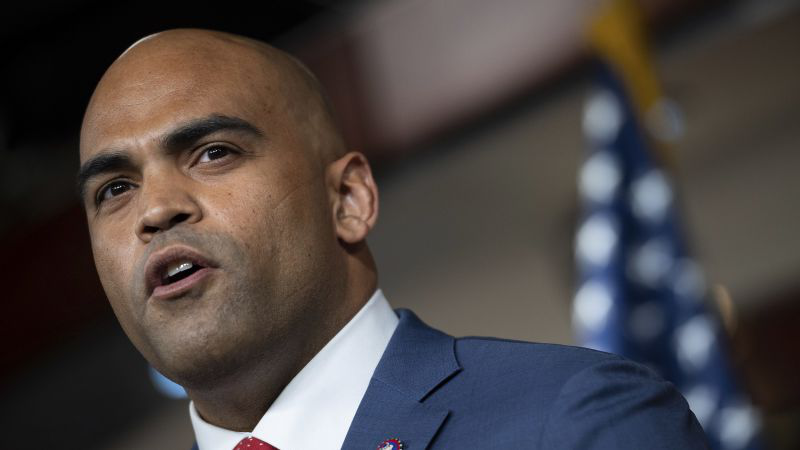

News Poster Link:  https://media.cnn.com/api/v1/images/stellar/prod/230503131014-01-colin-allred-file-2022.jpg?c=16x9&q=w_800,c_fill


In [ ]:
data=[]
link=[]
title=[]
image_link=[]
c=0
try:
  for news in news_list:
    c+=1
    if c <=2:
      print('Title: ',news.title.text)
      title.append(' '.join(news.title.text))
      print('News Link ',news.link.text)
      link.append(' '.join(news.link.text))
      news_data = Article(news.link.text)
      news_data.download()
      news_data.parse()
      data.append(''.join(news_data.text))
      best_summary=''.join(bert_model(news_data.text,min_length=30))
      print(best_summary)
      u = urlopen(news_data.top_image)
      raw_data = u.read()
      image = Image.open(io.BytesIO(raw_data))
      image.show()
      print("News Poster Link: ",news_data.top_image)
      image_link.append(news_data.top_image)

except:
  pass